In [6]:
import pandas as pd
import numpy as np
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
caminhos_csv = ['/content/drive/MyDrive/tcc/output/output_2mm.csv',
                '/content/drive/MyDrive/tcc/output/output_3mm.csv',
                '/content/drive/MyDrive/tcc/output/output_correlation.csv',
                '/content/drive/MyDrive/tcc/output/output_covariance.csv',
                '/content/drive/MyDrive/tcc/output/output_convolution-2d.csv',
                '/content/drive/MyDrive/tcc/output/output_atax.csv',
                '/content/drive/MyDrive/tcc/output/output_cholesky.csv',
                '/content/drive/MyDrive/tcc/output/output_doitgen.csv',
                '/content/drive/MyDrive/tcc/output/output_bicg.csv',
                '/content/drive/MyDrive/tcc/output/output_gemm.csv',
                '/content/drive/MyDrive/tcc/output/output_syrk.csv',
                '/content/drive/MyDrive/tcc/output/output_syr2k.csv',
                '/content/drive/MyDrive/tcc/output/output_symm.csv',
                '/content/drive/MyDrive/tcc/output/output_mvt.csv',
                '/content/drive/MyDrive/tcc/output/output_durbin.csv',
                '/content/drive/MyDrive/tcc/output/output_trmm.csv',
                '/content/drive/MyDrive/tcc/output/output_gramscmidt.csv',
                '/content/drive/MyDrive/tcc/output/output_lu.csv',
                '/content/drive/MyDrive/tcc/output/output_fdtd-apml.csv',
                '/content/drive/MyDrive/tcc/output/output_gemver.csv',
                '/content/drive/MyDrive/tcc/output/output_gesummv.csv']
nomes_benchmarks = ['2mm', '3mm', 'Correlation', 'Covariance', 'Convolution-2d', 'Atax', 'Cholesky',
                    'Doitgen', 'BicG', 'Gemm', 'Syrk', 'Syr2k', 'Symm', 'MVT', 'Durbin', 'Trmm',
                    'Gramscmidt', 'LU', 'Fdtd-apml', 'Gemver', 'Gesummv']

In [7]:
def microjoule_to_joule(value):
  valor = 1000000
  colunas= ['CORE','CPU','DRAM','DURATION','PSYS','UNCORE']
  value[colunas] = value[colunas]/valor
  value[colunas] = round(value[colunas], 2)
  return value

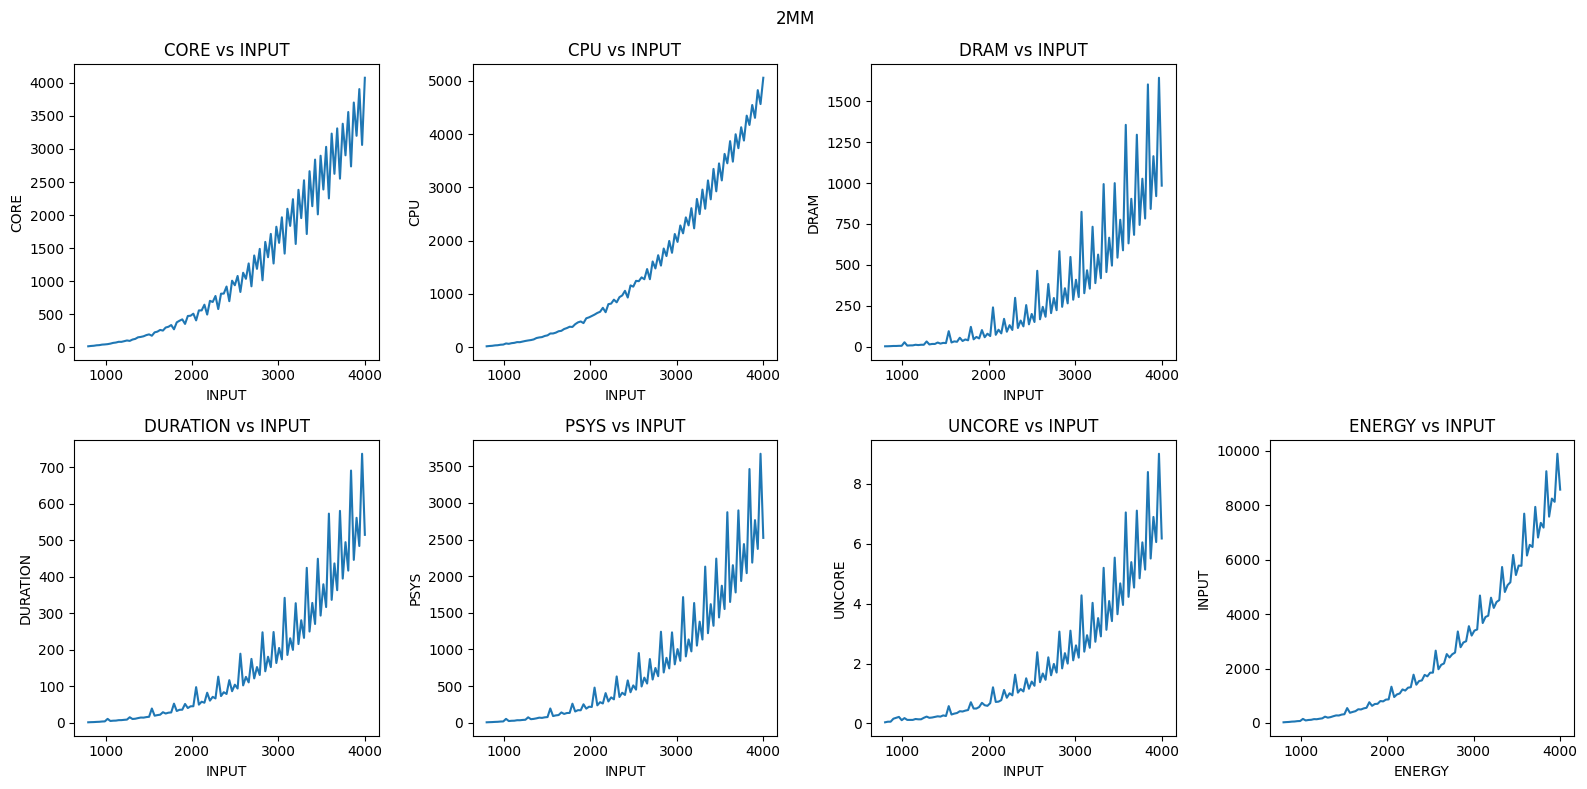

In [12]:
dados = pd.read_csv('../data/output/output_2mm.csv', sep=';')

dados = dados.drop(columns=["EXIT_CODE"])

dados = microjoule_to_joule(dados)

dados['ENERGY'] = dados['CPU'] + dados['DRAM'] + dados['PSYS'] + dados['UNCORE']

df = dados.groupby('INPUT').mean()
# Criando a figura e os subplots
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('2MM')
# Criando os subplots
axs[0, 0].plot(df.index, df['CORE'])
axs[0, 0].set_title('CORE vs INPUT')
axs[0, 0].set_xlabel('INPUT')
axs[0, 0].set_ylabel('CORE')

axs[0, 1].plot(df.index, df['CPU'])
axs[0, 1].set_title('CPU vs INPUT')
axs[0, 1].set_xlabel('INPUT')
axs[0, 1].set_ylabel('CPU')

axs[0, 2].plot(df.index, df['DRAM'])
axs[0, 2].set_title('DRAM vs INPUT')
axs[0, 2].set_xlabel('INPUT')
axs[0, 2].set_ylabel('DRAM')

axs[1, 0].plot(df.index, df['DURATION'])
axs[1, 0].set_title('DURATION vs INPUT')
axs[1, 0].set_xlabel('INPUT')
axs[1, 0].set_ylabel('DURATION')

axs[1, 1].plot(df.index, df['PSYS'])
axs[1, 1].set_title('PSYS vs INPUT')
axs[1, 1].set_xlabel('INPUT')
axs[1, 1].set_ylabel('PSYS')

axs[1, 2].plot(df.index, df['UNCORE'])
axs[1, 2].set_title('UNCORE vs INPUT')
axs[1, 2].set_xlabel('INPUT')
axs[1, 2].set_ylabel('UNCORE')

axs[1, 3].plot(df.index, df['ENERGY'])
axs[1, 3].set_title('ENERGY vs INPUT')
axs[1, 3].set_xlabel('ENERGY')
axs[1, 3].set_ylabel('INPUT')

plt.subplots_adjust(wspace=0.3, hspace=0.3)
axs[0, 3].remove()

# Exibindo a figura
plt.tight_layout()
plt.show()

In [11]:
dados = pd.read_csv('../data/output/output_2mm.csv', sep=';')
dados.head()

,CORE,CPU,DRAM,DURATION,PSYS,UNCORE,EXIT_CODE,INPUT
0,15570944,17551652,1523312,1308673,6075729,36316,0,800
1,20469368,22983828,1807125,1694991,7737774,61889,0,832
2,23662232,26687493,2504144,1908259,9094093,58654,0,864
3,30485091,34731234,3489249,2388988,11498933,160095,0,896
4,33108740,37755091,3431998,2717230,12886991,186157,0,928
